In [140]:
import pandas as pd

df = pd.read_excel('residentes.xlsx')
residentes = df.MEMBRO1.unique()
patrocinador = df.PATROCINADOR.unique()

df.head()

,FASE,PATROCINADOR,TEMA,DESCRICAO,MEMBRO1,MEMBRO2,MEMBRO3,MEMBRO4
0,FASE 2,ACESSO DIGITAL,OCR de CNH,NaN,Jéssica,Rafael,Gabriel,NaN
1,FASE 2,BOSCH,Tool Manager,NaN,Felipe,Harrison,Leonardo,NaN
2,FASE 2,BOTICÁRIO,Análise de tendência,NaN,Alessandra,Gabriela,Andre,NaN
3,FASE 2,COCAMAR,Auditor Digital,NaN,Lázaro,Bruna,Sávio,NaN
4,FASE 2,FARMGO,Identificar áreas produtivas,NaN,Letícia,Wana,Cristiano,NaN


In [141]:
df_residentes = pd.DataFrame(columns=residentes, index = residentes)
df_residentes.reset_index(inplace=True)

for residente in residentes:
    
    df_lista = pd.DataFrame()
    
    df1 = df.loc[df.MEMBRO1 == residente]
    df2 = df.loc[df.MEMBRO2 == residente]
    df3 = df.loc[df.MEMBRO3 == residente]
    df4 = df.loc[df.MEMBRO4 == residente]
    lista1 = df1.MEMBRO2
    lista1 = lista1.append(df1.MEMBRO3)
    lista1 = lista1.append(df1.MEMBRO4)
    lista1 = lista1.dropna()
    lista2 = df2.MEMBRO1
    lista2 = lista2.append(df2.MEMBRO3)
    lista2 = lista2.append(df2.MEMBRO4)
    lista2 = lista2.dropna()
    lista2 = lista1.append(lista2)
    lista3 = df3.MEMBRO1
    lista3 = lista3.append(df3.MEMBRO2)
    lista3 = lista3.append(df3.MEMBRO4)
    lista3 = lista3.dropna()
    lista3 = lista2.append(lista3)
    lista4 = df4.MEMBRO1
    lista4 = lista4.append(df4.MEMBRO2)
    lista4 = lista4.append(df4.MEMBRO3)
    lista4 = lista4.dropna()
    lista4 = lista3.append(lista4)
    
    df_lista = pd.DataFrame(lista4, columns=['residentes'])
    df_lista['num'] = 1
    df_lista = df_lista.groupby('residentes')['num'].count()
    df_lista = df_lista.reset_index()
    cols = df_lista.residentes.unique()
    
    for col in cols:
    
        valor = df_lista.loc[df_lista.residentes == col]
        df_residentes[residente].loc[df_residentes['index'] == col] = float(valor['num'].unique())
        
df_residentes.fillna(0, inplace=True)
df_residentes.set_index(df_residentes['index'],drop=False, inplace=True)

In [151]:
df_residentes.drop('index', axis=1, inplace=True)

In [155]:
df_residentes

,Jéssica,Felipe,Alessandra,Lázaro,Letícia,Duan,Daniel,Lucas,Gabriela,Bruna,Rafael,Vitor,Wana,Harrison,Sávio,Leonardo,Cristiano,Gabriel,Alexandre,André
index,,,,,,,,,,,,,,,,,,,,
Jéssica,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0
Felipe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0
Alessandra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0
Lázaro,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0
Letícia,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0
Duan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0
Daniel,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
Lucas,1.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
Gabriela,0.0,1.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0


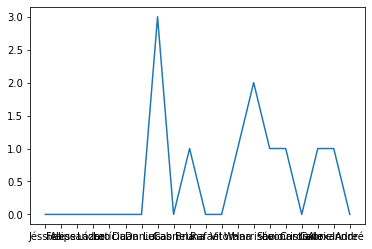

In [161]:
import matplotlib.pyplot as plt
plt.plot(df_residentes.Duan)